# MARVEL API

<div class="alert alert-success">In this notebook, we will cover two parts, first we will look at accessing the Marvel API and obtaining certain characteristic data relevant to 30 characters chosen at random. The end goal of the frst part is to create a data frame from the obtained results and save it to a csv file. The second part will feature creating an API that will allow us to access the previously created data frame. The calls/operations allowed on that API will be:
    
1. Obtaining character-related information: GET Request
2. Creating a new character (the user can either create a new character along with its respective characteristics, or obtain a character from the Marvel API as long as the character ID is unique): POST Request
3. Deleting a character or a list of characters based on character ID or character name: DELETE Request

However, the user will be required to sign up and create an account in order to be able to execute the POST and DELETE requests. Once logged in, the user has 1 hour to perform the previously mentioned tasks. Under the hood, an access token is generated to give the user this access.
</div>

The ```csv```we will create and interact with is called ```Assignment_1_B10.csv```. In addition to that file, in this exercise we will interact with the ```Assignment_1_B10.py``` file (python file representing the API).

### Readying your working environment

In what follows, we will use Python's ```requests```, ```hashlib```, ```time```, ```pandas```, ```numpy```, and ```requests``` libraries. To use them, you will need to manually install them first. Do so by running the cells below.

In addition to the above, within the API file we will be also using the ```flask_restful```, ```flask_bcrypt```, ```flask_jwt_extended```, and ```flask_jwt_extended``` libraries.

<div class="alert alert-warning">
    Remember that the cells below need only be executed the first time you open this notebook. Once the libraries are installed, you won't need to install them again everytime you want to use them. You can comment them to avoid running them accidentally.
</div>


# PART - 1

In [112]:
#FIRST, WE START BY IMPORTING THE NEEDED LIBRARIES - RUN THIS CELL AND DO NOT COMMENT ANY OF THE BELOW

import requests
import hashlib
import time
import pandas as pd
import numpy as np
import requests

In order to be able to access the Marvel API, we need to sign up and then obtain a public and a private key.

In [113]:
#PUBLIC AND PRIVATE KEYS ARE OBTAINED AFTER CREATING A MARVEL ACCOUNT

private_key = "a0192c1b28f08ee214ef997b12df962854ac07a4"
public_key = "094c7ab7bd000a68e4ec3afc8425fc5a"

The Marvel API requires us to append both public and private keys with a timestamp to access it. Then the ```hashlib.md5``` library will hash the key.

In [114]:
#THE MD5 HASHING TECHNIQUE IS USED TO OBTAIN AUTHENTICATION

ts = time.time()
st = str(ts)+private_key+public_key
result = hashlib.md5(st.encode('utf-8')).hexdigest()
result

'df73719aa5a6ee1cc8d005034d153409'

A GET request is then created to gain access. Keep in mind the results are limited to 30 characters. A "200" response means the request was successful.

In [115]:
#A GET REQUEST

response = requests.get('http://gateway.marvel.com/v1/public/characters?ts='+str(ts)+'&apikey=094c7ab7bd000a68e4ec3afc8425fc5a&hash='+result+'&limit=30')
response.status_code

200

In [116]:
#PRINTING THE JSON TO GET AN UNDERSTANDING OF THE DATA

response.json()

{'code': 200,
 'status': 'Ok',
 'copyright': '© 2022 MARVEL',
 'attributionText': 'Data provided by Marvel. © 2022 MARVEL',
 'attributionHTML': '<a href="http://marvel.com">Data provided by Marvel. © 2022 MARVEL</a>',
 'etag': '058e2d4187fd65934463f370fda5464db1330230',
 'data': {'offset': 0,
  'limit': 30,
  'total': 1562,
  'count': 30,
  'results': [{'id': 1011334,
    'name': '3-D Man',
    'description': '',
    'modified': '2014-04-29T14:18:17-0400',
    'thumbnail': {'path': 'http://i.annihil.us/u/prod/marvel/i/mg/c/e0/535fecbbb9784',
     'extension': 'jpg'},
    'resourceURI': 'http://gateway.marvel.com/v1/public/characters/1011334',
    'comics': {'available': 12,
     'collectionURI': 'http://gateway.marvel.com/v1/public/characters/1011334/comics',
     'items': [{'resourceURI': 'http://gateway.marvel.com/v1/public/comics/21366',
       'name': 'Avengers: The Initiative (2007) #14'},
      {'resourceURI': 'http://gateway.marvel.com/v1/public/comics/24571',
       'name': 'Av

For the sake of simplicity and readability, we will change the json file into a pandas dataframe which will help us visualize how the data is stored.

In [117]:
#ONLY THE FIRST 3 ROWS WILL BE PRINTED TO GAIN AN UNDERSTANDING OF THE DATA

df = pd.DataFrame(response.json()['data']['results'])
df.head(3)

,id,name,description,modified,thumbnail,resourceURI,comics,series,stories,events,urls
0,1011334,3-D Man,,2014-04-29T14:18:17-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 12, 'collectionURI': 'http://gat...","{'available': 3, 'collectionURI': 'http://gate...","{'available': 21, 'collectionURI': 'http://gat...","{'available': 1, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
1,1017100,A-Bomb (HAS),Rick Jones has been Hulk's best bud since day ...,2013-09-18T15:54:04-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 4, 'collectionURI': 'http://gate...","{'available': 2, 'collectionURI': 'http://gate...","{'available': 7, 'collectionURI': 'http://gate...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."
2,1009144,A.I.M.,AIM is a terrorist organization bent on destro...,2013-10-17T14:41:30-0400,{'path': 'http://i.annihil.us/u/prod/marvel/i/...,http://gateway.marvel.com/v1/public/characters...,"{'available': 51, 'collectionURI': 'http://gat...","{'available': 34, 'collectionURI': 'http://gat...","{'available': 54, 'collectionURI': 'http://gat...","{'available': 0, 'collectionURI': 'http://gate...","[{'type': 'detail', 'url': 'http://marvel.com/..."


# PART 1 - Question 1

Task 1 is to obtain a list of 30 characters as a list of strings.

In [118]:
#PROVIDING A LIST OF 30 MARVEL CHARACTERS

character_names = list(df['name'].values)
print('The list of', str(len(character_names)), 'characters are:')
character_names

The list of 30 characters are:


['3-D Man',
 'A-Bomb (HAS)',
 'A.I.M.',
 'Aaron Stack',
 'Abomination (Emil Blonsky)',
 'Abomination (Ultimate)',
 'Absorbing Man',
 'Abyss',
 'Abyss (Age of Apocalypse)',
 'Adam Destine',
 'Adam Warlock',
 'Aegis (Trey Rollins)',
 'Aero (Aero)',
 'Agatha Harkness',
 'Agent Brand',
 'Agent X (Nijo)',
 'Agent Zero',
 'Agents of Atlas',
 'Aginar',
 'Air-Walker (Gabriel Lan)',
 'Ajak',
 'Ajaxis',
 'Akemi',
 'Alain',
 'Albert Cleary',
 'Albion',
 'Alex Power',
 'Alex Wilder',
 'Alexa Mendez',
 'Alexander Pierce']

# PART 1 - Question 2

Task 2 is to obtain the list of character ID's for the previously obtained list of character names. The obtained data needs to be stored in a list as strings.

In order to check the data type of character ID's obtained, you can uncomment the code below.

In [119]:
#PROVIDING A LIST OF CHARACTER ID'S IN STR FORM

character_ids = list(df['id'].values)
print("The list of ID's for all the characters in the list are:")
list_of_char_ids = [str(x) for x in character_ids] #list comprehension was used for cleaner code
list_of_char_ids

#print(type(list_of_char_ids))
#print(type(list_of_char_ids[0]))

The list of ID's for all the characters in the list are:


['1011334',
 '1017100',
 '1009144',
 '1010699',
 '1009146',
 '1016823',
 '1009148',
 '1009149',
 '1010903',
 '1011266',
 '1010354',
 '1010846',
 '1017851',
 '1012717',
 '1011297',
 '1011031',
 '1009150',
 '1011198',
 '1011175',
 '1011136',
 '1011176',
 '1010870',
 '1011194',
 '1011170',
 '1009240',
 '1011120',
 '1010836',
 '1010755',
 '1011214',
 '1009497']

# PART 1 - Question 3

Task 3 is to obtain a list showcasing the number of events every one of the 30 characters was featured in. We also decided to sum the total number of events.

In [120]:
no_events = [character_event['available'] for character_event in df['events']]
print("The total number of events are:",sum(no_events))
print("The list of the number of events is:", no_events)

The total number of events are: 19
The list of the number of events is: [1, 0, 0, 0, 1, 0, 4, 1, 1, 0, 8, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# PART 1 - Question 4

Task 4 is to obtain a list showcasing the total number of series per character and their total

In [121]:
no_series = [character_series['available'] for character_series in df['series']]
print("The total number of series are:",sum(no_series))
print("The list of the number of series is:", no_series)

The total number of series are: 271
The list of the number of series is: [3, 2, 34, 3, 27, 2, 48, 3, 3, 0, 82, 0, 5, 10, 7, 3, 10, 13, 0, 3, 1, 0, 0, 0, 0, 1, 6, 4, 0, 1]


# PART 1 - Question 5

Task 5 is retrieving the number of comics that every character was featured in and their total.

In [122]:
no_comics = [character_series['available'] for character_series in df['comics']]
print("The total number of comics are:",sum(no_comics))
print("The list of the number of comics is:", no_comics)

The total number of comics are: 640
The list of the number of comics is: [12, 4, 51, 14, 55, 2, 96, 8, 3, 0, 188, 0, 29, 20, 29, 18, 29, 45, 0, 4, 4, 0, 0, 0, 0, 1, 18, 9, 0, 1]


# PART 1 - Question 6

For task 6, we have to obtain the maximum comic price that the character was featured in.

To do that, first we have to rely on the list of character ID's that we created earlier in order to use it and loop over the list of comics - notice ```response``` now mentions ```comics``` instead of ```characters``` and the limit of 30 is removed as we have characters who are featured in more than 30 comics.
Once that is done, within every character's list of comics, we search for all the prices and then obtain the maximum. This maximum price is then appended to a list ```list_of_max_prices``` which will be used in the following task to create the data frame.

In [123]:
y=0

list_of_max_prices = []

for char_id in list_of_char_ids:
    #We loop over the comics of every character based on respective ID
    response = requests.get('http://gateway.marvel.com/v1/public/characters/'+char_id+'/comics?ts='+str(ts)+'&apikey=094c7ab7bd000a68e4ec3afc8425fc5a&hash='+result)
    list_of_prices = []
    
    for value in range(len(response.json()['data']['results'])):
        list_of_comics = response.json()['data']['results'][value]['prices']
        
        for print_vs_online_comic_price in range(len(list_of_comics)):
            #Since every comic has two prices, a print and an online version, we need to loop over both to get the maximum
            individual_comic_price = list_of_comics[print_vs_online_comic_price]['price']
            list_of_prices.append(individual_comic_price)
    
    print("The maximum comic price that", df.iloc[y]['name'] ,"was featured in is: $", max(list_of_prices, default = 0))
    
    list_of_max_prices.append(max(list_of_prices, default = 0))
    
    y += 1

The maximum comic price that 3-D Man was featured in is: $ 2.99
The maximum comic price that A-Bomb (HAS) was featured in is: $ 2.99
The maximum comic price that A.I.M. was featured in is: $ 125
The maximum comic price that Aaron Stack was featured in is: $ 2.99
The maximum comic price that Abomination (Emil Blonsky) was featured in is: $ 75
The maximum comic price that Abomination (Ultimate) was featured in is: $ 3.99
The maximum comic price that Absorbing Man was featured in is: $ 75
The maximum comic price that Abyss was featured in is: $ 9.99
The maximum comic price that Abyss (Age of Apocalypse) was featured in is: $ 9.99
The maximum comic price that Adam Destine was featured in is: $ 0
The maximum comic price that Adam Warlock was featured in is: $ 125
The maximum comic price that Aegis (Trey Rollins) was featured in is: $ 0
The maximum comic price that Aero (Aero) was featured in is: $ 4.99
The maximum comic price that Agatha Harkness was featured in is: $ 49.99
The maximum comi

# PART 1 - Question 7

Now that we have all the data properly stored in lists, we can easily merge and transform them into a data frame called ```df```.
We can also change the zero values to be a ```None``` data type.

In [124]:
#STORING THE DATA INTO A DF WITH ZERO VALUES AS NONE

df = pd.DataFrame({'Character Name':character_names, 'Character ID':list_of_char_ids, 'Total Available Events':no_events, 'Total Available Series':no_series, 'Total Available Comics':no_comics, 'Price of the Most Expensive Comic':list_of_max_prices})
df = df.replace(0, None)


df

,Character Name,Character ID,Total Available Events,Total Available Series,Total Available Comics,Price of the Most Expensive Comic
0,3-D Man,1011334,1,3,12,2.99
1,A-Bomb (HAS),1017100,None,2,4,2.99
2,A.I.M.,1009144,None,34,51,125.0
3,Aaron Stack,1010699,None,3,14,2.99
4,Abomination (Emil Blonsky),1009146,1,27,55,75.0
5,Abomination (Ultimate),1016823,None,2,2,3.99
6,Absorbing Man,1009148,4,48,96,75.0
7,Abyss,1009149,1,3,8,9.99
8,Abyss (Age of Apocalypse),1010903,1,3,3,9.99
9,Adam Destine,1011266,None,None,None,None


As a check, we can investigate the data type of a ```None``` value in our data frame by running the code below.

In [125]:
type(df.iloc[1]['Total Available Events'])

NoneType

# PART 1 - Question 8

Finally, we need to export the created data frame to a ```csv``` file. Please specify the directory in the ```file_path``` parameter below.

Make sure that the ```csv``` file directory is the same as your downloaded ```.ipynb``` and ```.py``` files!

Do not change the file name!

In [126]:
#CREATING THE FILE PATH LOCALLY AND THEN SAVING IT AS A CSV FILE

file_name = 'Assignment_1_B10'
file_path = '/Users/michaelmerheb/Desktop/MIBA + BIP/MIBA/Cloud Computing/Assignment 1/' + file_name + '.csv'
df.to_csv(file_path, index = False)

<div class="alert alert-success">Now that Part 1 is complete, we can commence part 2. As mentioned previously, we will now use the created API (python file name: Assignment_1_B10_P2.py) to access the data frame we created and amend the csv (name: Assignment_1_B10.csv) file we created about the 30 Marvel characters.
    
We will also see how we have protected our data frame from manipulation (character addition and deletion) from unregistered users. User will be first prompted to sign up and log in, in order to be able to perform the mentioned task.
</div>

# PART - 2

Tasks 1 & 2 of the second part can completed by calling the following class: ```app = Flask(__name__)``` and then ```api = Api(app)```

# PART 2 - Question 3.1

To be able to interact with the API, first we need to be able to run the ```.py``` file we have.
We can do this with 4 steps (for mac users) highlighted below:

Step 1:Copy the name of the file
Step 2: Open a new terminal from the file containing the ```.py``` file

Step 3: Once the terminal is launched, write ```python Assignment_1_B10_P2.py``` where `Assignment_1_B10_P2.py` is the name of the API file

Step 4: Run the code and make sure you get the same output as the below. Once you do, you're good to go!

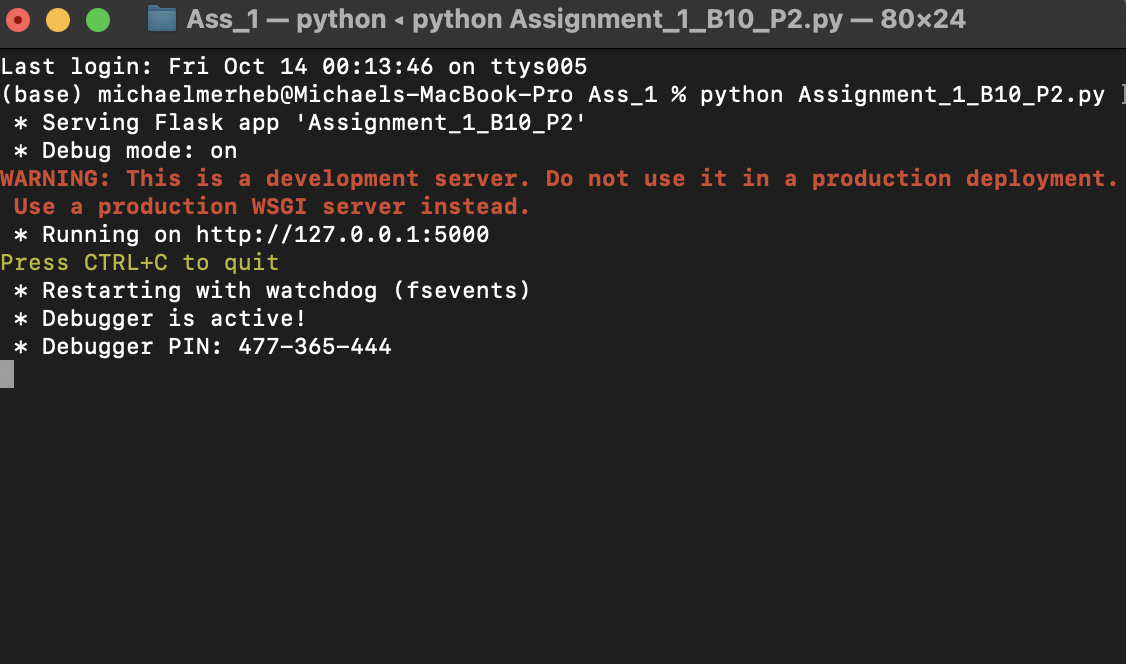

Task 3-A obtains the whole data frame by calling the ```GET Request```.

a ```200``` status means the request was successful. Otherwise a ```400``` request signifies an error has occured.

In [127]:
#Obtaining the whole Data Frame in json format

requests.get('http://127.0.0.1:5000/characters', json={}).json()

{'status': 200,
 'response': [{'Character Name': '3-D Man',
   'Character ID': 1011334,
   'Total Available Events': 1.0,
   'Total Available Series': 3.0,
   'Total Available Comics': 12.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'A-Bomb (HAS)',
   'Character ID': 1017100,
   'Total Available Events': nan,
   'Total Available Series': 2.0,
   'Total Available Comics': 4.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'A.I.M.',
   'Character ID': 1009144,
   'Total Available Events': nan,
   'Total Available Series': 34.0,
   'Total Available Comics': 51.0,
   'Price of the Most Expensive Comic': 125.0},
  {'Character Name': 'Aaron Stack',
   'Character ID': 1010699,
   'Total Available Events': nan,
   'Total Available Series': 3.0,
   'Total Available Comics': 14.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'Abomination (Emil Blonsky)',
   'Character ID': 1009146,
   'Total Available Events': 1.0,
   'Total 

# PART 2 - Question 3.2 

Task 3-B is retrieving information for a single entry or for a list of entries identified by either the Character Name or the ```Character ID```. Make sure the single or list of ```Character Name``` exists in our ```csv``` file otherwise we'll get an error!

In [129]:
#Obtaining information for a single entry - Character Name

character_name = str(input("Please write the name of the character you wish to retrieve data for\n"))

requests.get('http://127.0.0.1:5000/characters', json={'Character Name': character_name}).json()

Please write the name of the character you wish to retrieve data for
3-D Man


{'status': 200,
 'response': [{'Character Name': '3-D Man',
   'Character ID': 1011334,
   'Total Available Events': 1.0,
   'Total Available Series': 3.0,
   'Total Available Comics': 12.0,
   'Price of the Most Expensive Comic': 2.99}]}

In [143]:
#Obtaining information for a list of entries - Character Name

requests.get('http://127.0.0.1:5000/characters', json={'Character Name': ['3-D Man', 'Ajak']}).json()

{'status': 200,
 'response': [{'Character Name': '3-D Man',
   'Character ID': 1011334,
   'Total Available Events': 1.0,
   'Total Available Series': 3.0,
   'Total Available Comics': 12.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'Ajak',
   'Character ID': 1011176,
   'Total Available Events': 1.0,
   'Total Available Series': 1.0,
   'Total Available Comics': 4.0,
   'Price of the Most Expensive Comic': 2.99}]}

Make sure the single or list of ```Character ID``` exists in our ```csv``` file and it's in ```int``` form, otherwise we'll get an error!

In [131]:
#Obtaining information for a single entry - Character ID

character_ID = int(input("Please write the ID of the character you wish to retrieve data for\n"))

requests.get('http://127.0.0.1:5000/characters', json={'Character ID': character_ID}).json()

Please write the ID of the character you wish to retrieve data for
1010870


{'status': 200,
 'response': [{'Character Name': 'Ajaxis',
   'Character ID': 1010870,
   'Total Available Events': nan,
   'Total Available Series': nan,
   'Total Available Comics': nan,
   'Price of the Most Expensive Comic': nan}]}

In [144]:
#Obtaining information for a list of entries - Character ID - make sure the ID is an integer!

requests.get('http://127.0.0.1:5000/characters', json={'Character ID': [1011334, 1017100, 1011136]}).json()

{'status': 200,
 'response': [{'Character Name': '3-D Man',
   'Character ID': 1011334,
   'Total Available Events': 1.0,
   'Total Available Series': 3.0,
   'Total Available Comics': 12.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'A-Bomb (HAS)',
   'Character ID': 1017100,
   'Total Available Events': nan,
   'Total Available Series': 2.0,
   'Total Available Comics': 4.0,
   'Price of the Most Expensive Comic': 2.99},
  {'Character Name': 'Air-Walker (Gabriel Lan)',
   'Character ID': 1011136,
   'Total Available Events': 1.0,
   'Total Available Series': 3.0,
   'Total Available Comics': 4.0,
   'Price of the Most Expensive Comic': 9.99}]}

# PART 2 - Question 3.3

This part of the code entails signing up/creating an account and then logging-in so that we can further interact with the API by calling ```POST``` and ```DELETE```requests

In [135]:
#Sign-up - if you get a 409 error it is because the user credentials already exist, otherwise you get a 200 code
#'michael.merheb@alumni.esade.edu'

requests.post('http://127.0.0.1:5000/signup', json={'email':'michael.merheb@alumni.esade.edu', 'password':'123'})

<Response [409]>

Next step is logging in. Once you provided your email and password above, you can simply paste it in the cell below to log in.
Keep in mind that if you get a ```409``` error in the cell above it's because the user already signed up with the same credentials.

In [137]:
#Logging-in

response = requests.get('http://127.0.0.1:5000/login', json={'email':'michael.merheb@alumni.esade.edu', 'password':'123'}).json()

access_token = response['token']
headers = {'Authorization': f'Bearer {access_token}'}

Next step, task 3-C, is to add a new character to the ```csv``` by manually defining all its attributes, as long as the ```Character ID``` is unique. You can go ahead and define a new character by running the cell below and providing the details requested.

In [138]:
#Adding a new character to the existing DataFrame by specifying its characteristics
#A return value of 200 means the character has been successfully added to our data frame

char_name = str(input("Please write the name of the character you wish to create.\n"))
char_id = str(input("Please write the ID of the character you wish to create.\n"))
tot_av_events = int(input("How many events did your character appear in?\n"))
tot_av_series = int(input("How many series did your character appear in?\n"))
tot_av_comics = int(input("How many comics did your character appear in?\n"))
max_comic_price = int(input("What was the maximum comic price that your character was featured in?\n"))

requests.post('http://127.0.0.1:5000/characters', json={'Character Name': char_name,
                                                        'Character ID': char_id,
                                                        'Total Available Events': tot_av_events,
                                                        'Total Available Series': tot_av_series,
                                                        'Total Available Comics': tot_av_comics,
                                                        'Price of the Most Expensive Comic': max_comic_price}, 
              headers=headers).json()

Please write the name of the character you wish to create.
mike
Please write the ID of the character you wish to create.
123
How many events did your character appear in?
1
How many series did your character appear in?
2
How many comics did your character appear in?
3
What was the maximum comic price that your character was featured in?
123


{'status': 200,
 'response': [{'Character Name': 'mike',
   'Character ID': 123,
   'Total Available Events': 1.0,
   'Total Available Series': 2.0,
   'Total Available Comics': 3.0,
   'Price of the Most Expensive Comic': 123.0}]}

# PART 2 - Question 3.4

Sometimes, the user might want to add a new character to the created data frame that he/she knows exists in the Marvel API but not in our data frame. Again, this is done based on the ```Character ID```.

For that, as task 3-D implies, we need to first cross-check the ```Character ID``` with our existing data frame and make sure it does not exist. Otherwise we inform the user that the character is already in our list.
Then, we check if the ```Character ID``` DOES NOT exist in the Marvel API, otherwise we inform the user of that as well.

If both previous checks are okay, and the ```Character ID``` provided exists in the Marvel API, we can retrieve the relevant character attributes and append it to our existing data frame.

This can be done by simply providing the ```Character ID``` whenever prompted after running the code below.

In [139]:
#Please run this cell and then provide the Character ID when prompted

char_id = str(input("Please provide the character ID you wish to add to the data frame.\n"))

requests.post('http://127.0.0.1:5000/characters', json={'Character ID': char_id}, headers=headers).json()

Please provide the character ID you wish to add to the data frame.
1009531


{'status': 200,
 'response': [{'Character Name': 'Raza',
   'Character ID': 1009531,
   'Total Available Events': 2.0,
   'Total Available Series': 13.0,
   'Total Available Comics': 35.0,
   'Price of the Most Expensive Comic': 9.99}]}

# PART 2 - Question 3.5

Finally, in task 3-E, we would like to enable the user to delete characters from the data frame based on ```Character ID``` provided. Again, this can be done by providing the ```Character ID``` when prompted after running the cells below.

A response of ```200``` indicates the process was successful.

In [140]:
#Deleting character by providing Character Name

char_name = str(input("Please provide the character name you wish to delete from the data frame.\n"))

requests.delete('http://127.0.0.1:5000/characters', json={'Character Name': char_name}, headers = headers)

Please provide the character name you wish to delete from the data frame.
Raza


<Response [200]>

In [142]:
#Deleting character by providing Character ID

char_id = int(input("Please provide the character ID you wish to delete from the data frame.\n"))

requests.delete('http://127.0.0.1:5000/characters', json={'Character ID': char_id}, headers = headers)

Please provide the character ID you wish to delete from the data frame.
1010755


<Response [200]>